# Porosity and VSH estimation (regression with MLP) - Alwyn data set



***

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor


__Considering a "clean" (after removing missing values and outliers...) data set and testing for three available wells:__

In [51]:
# The data is from three wells: N9, N14, N18.
poroshale = pd.read_csv(r'C:\Users\Admin\Documents\Machine_learning_ifp\test\Well_logs.csv')

In [52]:
def decimal_format(x): #I want to display only two decimal numbers
    pd.options.display.float_format = "{:,.2f}".format
decimal_format(poroshale)


In [53]:
poroshale.describe().T

,count,mean,std,min,25%,50%,75%,max
TVDSS,"3,014.00","3,279.96",69.30,"3,138.22","3,228.63","3,275.46","3,322.28","3,431.90"
NPHI,"3,014.00",0.18,0.06,0.06,0.14,0.18,0.21,0.39
GR,"3,014.00",46.18,23.19,10.36,29.19,42.49,58.16,121.08
RHOB,"3,014.00",2.36,0.10,2.19,2.28,2.35,2.42,2.63
PHIE,"3,014.00",0.17,0.07,0.00,0.14,0.18,0.22,0.26
VSH,"3,014.00",0.15,0.28,0.00,0.00,0.00,0.15,1.00


In [54]:
print('shape of the data frame: ', poroshale.shape)

shape of the data frame:  (3014, 7)


***

## Building the ML model:

- ### 1) Separating the data set

In [55]:
inputs = ['NPHI', 'GR', 'RHOB']
outputs = ['PHIE', 'VSH']


x = poroshale[inputs].to_numpy()
y = poroshale[outputs].to_numpy()

x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)

x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

print('x.shape =', x.shape, '| x_train.shape =', x_train.shape, '| x_test.shape =', x_test.shape, '| x_valid.shape =', x_valid.shape)
print('y.shape =', y.shape, '| y_train.shape =', y_train.shape, '| y_test.shape =', y_test.shape, '| y_valid.shape =', y_valid.shape)

x.shape = (3014, 3) | x_train.shape = (1808, 3) | x_test.shape = (603, 3) | x_valid.shape = (603, 3)
y.shape = (3014, 2) | y_train.shape = (1808, 2) | y_test.shape = (603, 2) | y_valid.shape = (603, 2)


- ### 2) Scaling the data (Run only one: standard scaler of minmax scaler)

In [35]:
# Makes it easy for a model to learn and understand the problem.
# Algorithms calculate the distance between the data points to make better inferences out of the data.
# If the values of the features are closer to each other there are chances for the algorithm to get
# trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. 
# Regression uses this principle as its basic function.
# https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(x_train)  
x_train = scaler.transform(x_train)    

x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

- ### 2.1) Scaling the data (minmax scaler) [Depending of what we want to use]

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)  
x_train = scaler.transform(x_train)    

x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [57]:
x_train[:,2].mean()

0.39278119570048925

- ### 4) Trying MLP for regression (building the model)


Predicting PHIE
RMSE for training set: 0.013250366733519056
RMSE for testing set: 0.01332781959380537
R2 for training set: 0.9621122783180304
R2 for testing set: 0.9601357585513391


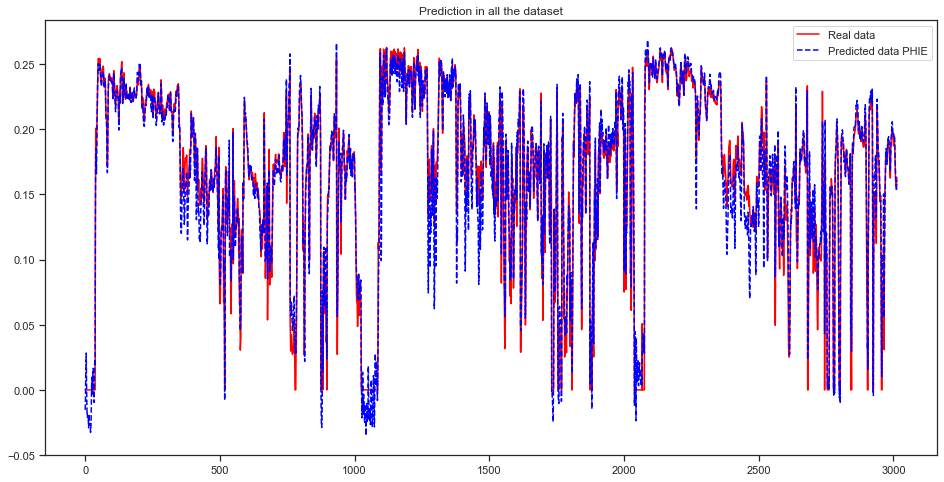


Predicting VSH
RMSE for training set: 0.05458002999554875
RMSE for testing set: 0.055556169320369796
R2 for training set: 0.9609559465165902
R2 for testing set: 0.9555555095736132


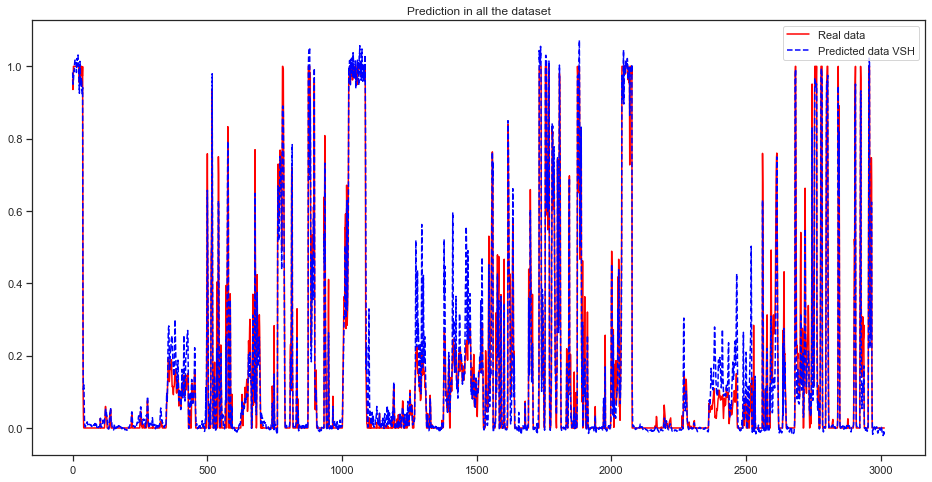

In [58]:
models = []
x_train_predicted = []
x_test_predicted = []


for i in range(2):
    print('\nPredicting ' + outputs[i])
    
    #Parameters defined after performing hyperparameter tuning
    
    regr = MLPRegressor(activation= 'relu', alpha= 0.1,hidden_layer_sizes= (100,), 
                    max_iter = 500, solver = 'lbfgs', random_state=1).fit(x_train, y_train[:,i])
    models.append(regr)
   
    x_train_predicted.append(regr.predict(x_train))
    x_test_predicted.append(regr.predict(x_test))

    RMSE_train = mean_squared_error(y_train[:,i], x_train_predicted[-1], squared=False)
    RMSE_test = mean_squared_error(y_test[:,i], x_test_predicted[-1], squared=False)

    print('RMSE for training set:', RMSE_train)
    print('RMSE for testing set:', RMSE_test)
    
    R2_train = r2_score(y_train[:,i], x_train_predicted[-1])
    R2_test = r2_score(y_test[:,i], x_test_predicted[-1])
    
    print('R2 for training set:', R2_train)
    print('R2 for testing set:', R2_test)
    
    plt.figure(figsize=(16, 8))
    plt.plot(y[0:,i], color = 'red', label = 'Real data') 
    plt.plot(regr.predict(scaler.transform(x)), color = 'blue', label = 'Predicted data ' + outputs [i], linestyle='dashed')
    plt.title('Prediction in all the dataset')
    plt.legend()
    plt.show()

In [60]:
poroshale.describe().T

,count,mean,std,min,25%,50%,75%,max
TVDSS,"3,014.00","3,279.96",69.30,"3,138.22","3,228.63","3,275.46","3,322.28","3,431.90"
NPHI,"3,014.00",0.18,0.06,0.06,0.14,0.18,0.21,0.39
GR,"3,014.00",46.18,23.19,10.36,29.19,42.49,58.16,121.08
RHOB,"3,014.00",2.36,0.10,2.19,2.28,2.35,2.42,2.63
PHIE,"3,014.00",0.17,0.07,0.00,0.14,0.18,0.22,0.26
VSH,"3,014.00",0.15,0.28,0.00,0.00,0.00,0.15,1.00


In [63]:
poroshale[poroshale['VSH']==0].describe().T #1498 (VSH) samples from 3014 are equal to 0. 

,count,mean,std,min,25%,50%,75%,max
TVDSS,"1,498.00","3,276.59",71.55,"3,151.33","3,221.32","3,271.49","3,323.50","3,422.14"
NPHI,"1,498.00",0.15,0.04,0.06,0.12,0.15,0.19,0.25
GR,"1,498.00",30.18,11.88,10.36,19.17,30.39,39.37,79.86
RHOB,"1,498.00",2.30,0.06,2.19,2.26,2.30,2.34,2.56
PHIE,"1,498.00",0.20,0.04,0.12,0.18,0.20,0.23,0.26
VSH,"1,498.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00


- ### 5) Trying MLP for regression (later prediction/validation)


predicting PHIE
RMSE for laterprediction: 0.01356548189561925
R2 for laterprediction: 0.9622612651062938


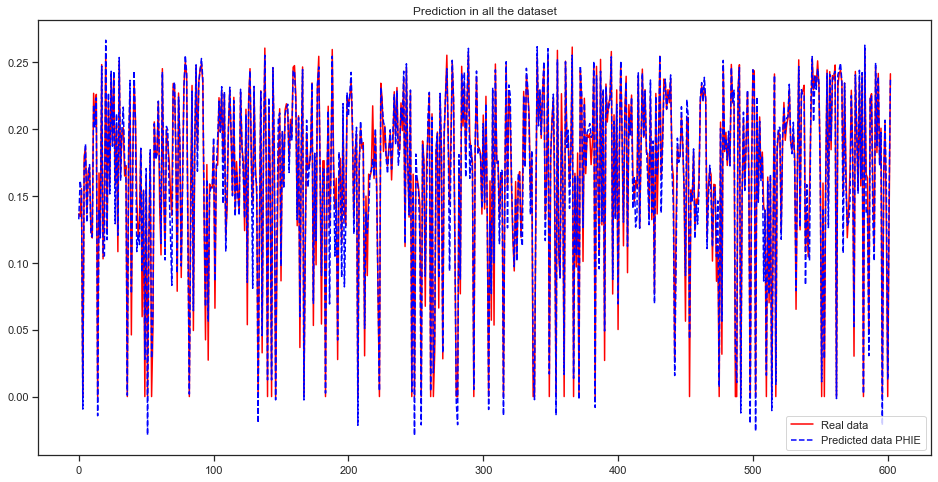


predicting VSH
RMSE for laterprediction: 0.05861473870977256
R2 for laterprediction: 0.9597543382263336


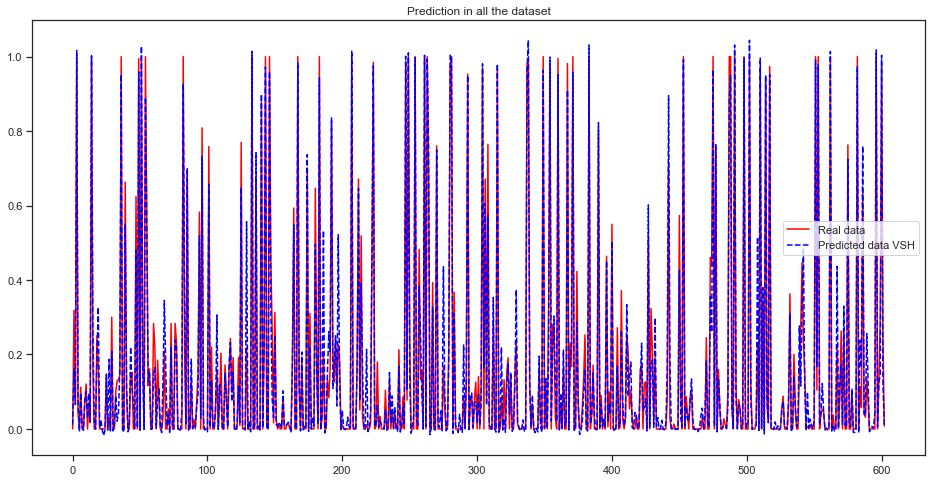

In [68]:
Y_laterprediction_predicted = []

for i in range(2):
    print('\npredicting ' + outputs[i])
    regr = models[i]
    
    Y_laterprediction_predicted.append(regr.predict(x_valid))

    RMSE_laterprediction = mean_squared_error(y_valid[:,i], Y_laterprediction_predicted[-1], squared=False)
    print('RMSE for laterprediction:', RMSE_laterprediction)
    
    R2_laterprediction = r2_score(y_valid[:,i], Y_laterprediction_predicted[-1])
    print('R2 for laterprediction:', R2_laterprediction)
    
    plt.figure(figsize=(16, 8))
    plt.plot(y_valid[0:,i], color = 'red', label = 'Real data') # error in Katia's, y is the original dataframe in numpy, with PHIE&VSH
    plt.plot(Y_laterprediction_predicted[-1], color = 'blue', label = 'Predicted data ' + outputs [i], linestyle='dashed')
    plt.title('Prediction in all the dataset')
    plt.legend()
    plt.show()
    

### Saving the model for future repetition

In [71]:
import bz2
import pickle
import _pickle as cPickle
for i, var in enumerate(outputs):
    with bz2.BZ2File('test' + var + '_model.pbz2', 'wb') as f: 
        cPickle.dump(models[i], f)

In [72]:
# Code to load:
import bz2
import pickle
import _pickle as cPickle
models = []
for i, var in enumerate(outputs): # PHIF,VSH
    with bz2.BZ2File('test' + var + '_model.pbz2', 'rb') as f: 
        models.append(cPickle.load(f))
print('ok')
#Source: https://stackoverflow.com/questions/67812044/decision-forest-problem-with-loading-saved-model

ok
